In [12]:
# Importamos los módulos de sidermit

from sidermit.city import Graph, Demand
from sidermit.optimization import Optimizer
from sidermit.publictransportsystem import TransportMode
from sidermit.publictransportsystem import TransportNetwork
from sidermit.publictransportsystem import passenger

# Importamos los módulos de otras librerías

import pandas as pd
import numpy as np
import time

In [13]:
# build city
graph_obj = Graph.build_from_parameters(n=6, l=10, g=1.8, p=1)
passenger_obj =  passenger.Passenger(va=4, pv=2.74, pw=5.48, pa=0, pt=16, spv=2.74, spw=5.48, spa=0, spt=16)
bus_obj=  TransportMode(name='bus', bya=0, co=8.61 , c1=0.15, c2=0, v=20, t=2.5, fmax=150, kmax=160, theta=0.5, tat=0, d=1, fini=12)

In [14]:
# build a network without routes
network_obj = TransportNetwork(graph_obj)

circular_route = network_obj.get_circular_routes(mode_obj=bus_obj)
diametral_route = network_obj.get_diametral_routes(mode_obj=bus_obj, jump=3, short=True, express=False)
feeder_route = network_obj.get_feeder_routes(mode_obj=bus_obj)
radial_route = network_obj.get_radial_routes(mode_obj=bus_obj, short=False, express=False)

# to add diametral and circular routes to transport network
for route in diametral_route:
    network_obj.add_route(route)
for route in circular_route:
    network_obj.add_route(route)
for route in feeder_route:
    network_obj.add_route(route)

In [15]:
# get all routes in network:obj
routes = network_obj.get_routes()
for route in routes:
    print(route.id)

DS3_bus_1
DS3_bus_2
DS3_bus_3
CIR_I_bus
CIR_R_bus
F_bus_1
F_bus_2
F_bus_3
F_bus_4
F_bus_5
F_bus_6


In [16]:
demand_obj = Demand.build_from_parameters(graph_obj, y=6000, a=0.2, alpha=0.3, beta=0.6) # Define demand
opt_obj = Optimizer.network_optimization(graph_obj, demand_obj, passenger_obj, network_obj, max_number_of_iteration=5, tolerance=0.1)

INFO:sidermit.optimization.optimizer:Internal optimization
	Success: True
	Status: 1
	Message: `gtol` termination condition is satisfied.
	new_f: [17.05432994 17.05432994 17.05433547  7.80135281  7.85617809  6.19340036
  6.19340043  6.19343691  6.19340344  6.19340984  6.19340984]
	Constrain violation: 0.0
	VRC: 16504.858557104817
INFO:sidermit.optimization.optimizer:f_norm_distance: 58.345003626708646
INFO:sidermit.optimization.optimizer:Internal optimization
	Success: True
	Status: 1
	Message: `gtol` termination condition is satisfied.
	new_f: [17.05432994 17.05432994 17.05433547  7.80135281  7.85617809  6.19340036
  6.19340043  6.19343691  6.19340344  6.19340984  6.19340984]
	Constrain violation: 0.0
	VRC: 16504.858557104817
INFO:sidermit.optimization.optimizer:f_norm_distance: 0.0
INFO:sidermit.optimization.optimizer:

Optimization Results
Success: True
Status: 1
Message: `gtol` termination condition is satisfied.
Max constrain violation: 0.0
VRC: 16504.858557104817

Frequency infor

In [17]:
print('VRC con lineas diametrales y circular 8896.118496414207, 3 zonas')
print('VRC con lineas feeder y circular 8900.592822122, 3 zonas')
print('VRC con lineas feeder 8449.955, 3 zonas')

print('VRC con lineas feeder y circular 11073.3949 , 4 zonas')
print('VRC con lineas diametrales y circular 11679.06826 , 4 zonas')

print('VRC con lineas diametrales y circular 17354.2475 , 6 zonas')
print('VRC con lineas feeder y circular 16504.8585 , 6 zonas')

VRC con lineas diametrales y circular 8896.118496414207, 3 zonas
VRC con lineas feeder y circular 8900.592822122, 3 zonas
VRC con lineas feeder 8449.955, 3 zonas
VRC con lineas feeder y circular 11073.3949 , 4 zonas
VRC con lineas diametrales y circular 11679.06826 , 4 zonas
VRC con lineas diametrales y circular 17354.2475 , 6 zonas


# Visualizar EDL

In [4]:
from AlgoritmoGenetico.Poblacion.individuo import Individuo
from AlgoritmoGenetico.BaseDatos.BD import BD
from sidermit.publictransportsystem import TransportMode

In [1]:
n_zonas = 6
bd = BD(n_zonas)

In [5]:
tmode=  TransportMode(name='bus', bya=0, co=8.61 , c1=0.15, c2=0, v=20, t=2.5, fmax=150, kmax=160, theta=0.5, tat=0, d=1, fini=5)


In [10]:
def graficar(edl, prefijo):
    ind = Individuo(edl)
    ind.build_network(6, L=10, g=1.8, P=1, custom_tmode=tmode, bd=bd)
    for route in ind.network_sidermit.get_routes():
        ind.network_sidermit.plot(f'sidermit{n_zonas}zonasLinea{route.id}{prefijo}.png', list_routes=[route.id])

C:\Users\valee\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


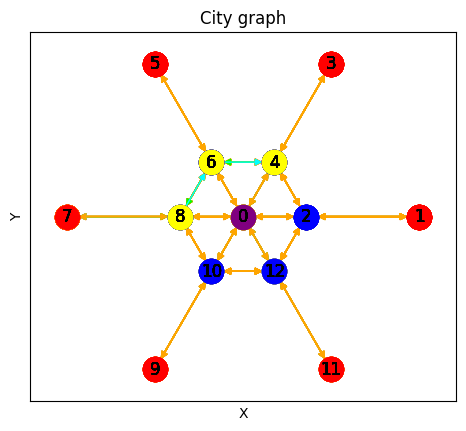

In [11]:
g1 = [36, 4647, 298, 299, 333, 15, 17, 18, 19, 403, 438, 219, 61, 223]
graficar(g1, 'g1')

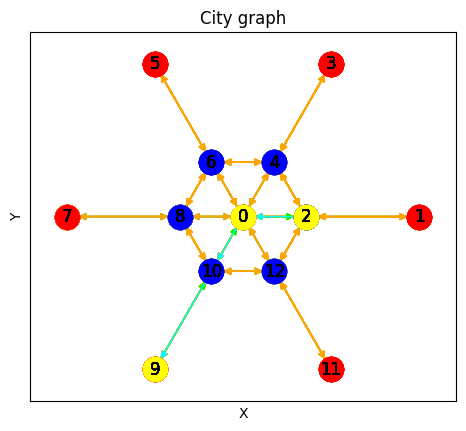

In [12]:
g4 = [408, 4647, 1096, 298, 333, 19, 21, 438, 984, 219, 1276, 382]
graficar(g4, 'g4')

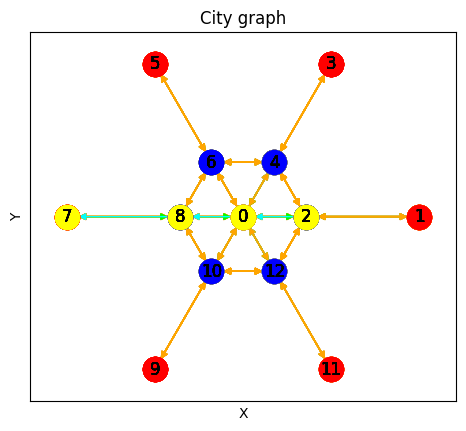

In [13]:
g5 = [1377, 4647, 298, 1195, 333, 17, 884, 438, 986, 219, 1276]
graficar(g5, 'g5')

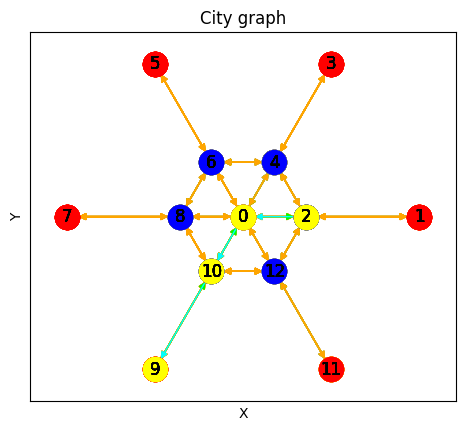

In [14]:
g7 = [1280, 1188, 263, 4647, 298, 17, 18, 438, 5496, 218, 1375]
graficar(g7, 'g7')

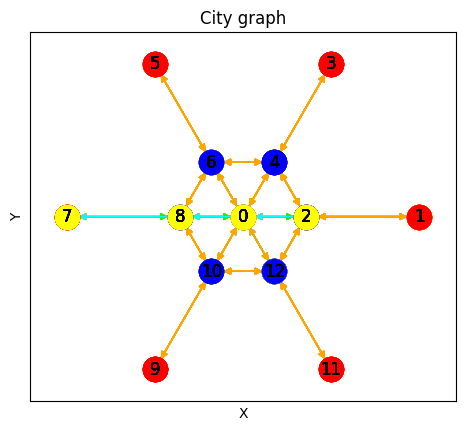

In [15]:
g11 = [1376, 248, 4647, 200, 1481, 298, 333, 19, 984, 1276]
graficar(g11, 'g11')

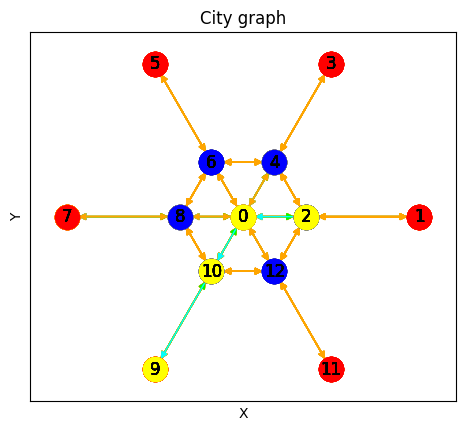

In [16]:
g13 = [263, 200, 1480, 298, 4647, 1836, 20, 218, 1276, 1277, 1375]
graficar(g13, 'g13')

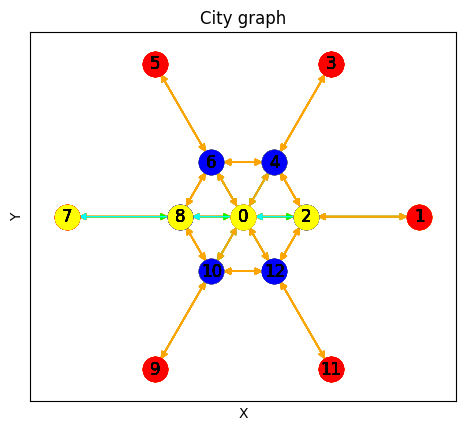

In [17]:
g14 = [1088, 1479, 200, 4647, 333, 403, 20, 984, 218, 1276]
graficar(g14, 'g14')